In [1]:
import pymongo

In [2]:
import matplotlib.pyplot as plt

In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["Packets"]

In [4]:
collection = db["IpSrc"]
ip_counts = {}
for entry in collection.find({}, {"ip_src": 1, "count": 1}):
    ip = entry["ip_src"]
    count = entry["count"]
    if ip and isinstance(ip, str):  #
        if ip in ip_counts:
            ip_counts[ip] += count
        else:
            ip_counts[ip] = count

# Preparazione dei dati per il grafico
ip_addresses = list(ip_counts.keys())
counts = list(ip_counts.values())

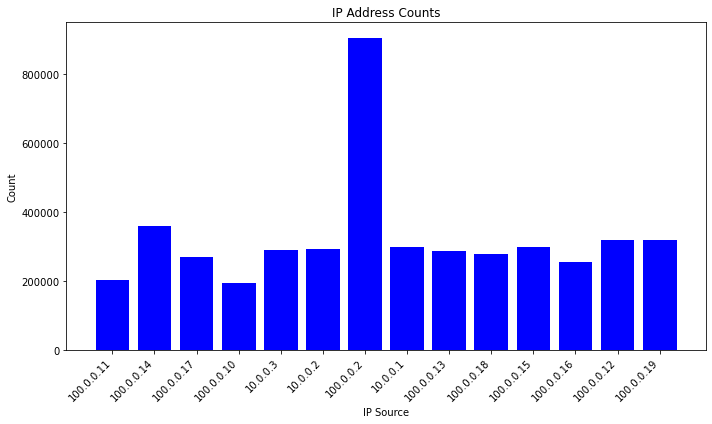

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(ip_addresses, counts, color='blue')
plt.xlabel('IP Source')
plt.ylabel('Count')
plt.title('IP Address Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [9]:
db = client['Packets']  # Sostituisci con il nome del tuo database
collection = db['IpSrc'] 
desired_dates = ['2023-08-16', '2023-08-17']  # Sostituisci con le date che ti interessano

# Ottieni i dati dalla collezione MongoDB per le date desiderate
pipeline = [
    {
        "$match": {
            "date": {"$in": desired_dates}
        }
    },
    {
        "$group": {
            "_id": {
                "date": "$date",
                "ip_src": "$ip_src"
            },
            "total_packets": {"$sum": "$count"}
        }
    }
]

result = list(collection.aggregate(pipeline))



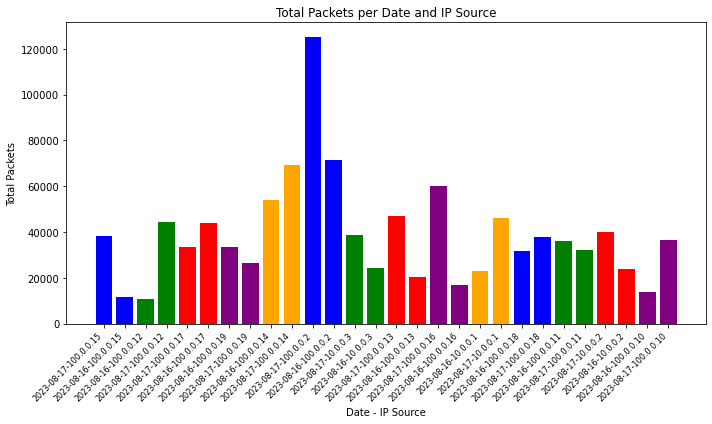

In [13]:
ip_groups = {}
for entry in result:
    ip_src = entry['_id']['ip_src']
    if ip_src not in ip_groups:
        ip_groups[ip_src] = []
    ip_groups[ip_src].append(entry)

# Prepara i dati per il grafico e assegna colori
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Aggiungi più colori se necessario
for i, (ip_src, entries) in enumerate(ip_groups.items()):
    labels = [f"{entry['_id']['date']}-{ip_src}" for entry in entries]
    total_packets = [entry['total_packets'] for entry in entries]
    plt.bar(labels, total_packets, color=colors[i % len(colors)])

plt.xlabel('Date - IP Source')
plt.ylabel('Total Packets')
plt.title('Total Packets per Date and IP Source')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [12]:
collection = db["IpDst"]
ip_counts = {}
for entry in collection.find({}, {"ip_dst": 1, "count": 1}):
    ip = entry["ip_dst"]
    count = entry["count"]
    if ip and isinstance(ip, str):  # Ignora gli indirizzi IP nulli e altri tipi
        if ip in ip_counts:
            ip_counts[ip] += count
        else:
            ip_counts[ip] = count

# Preparazione dei dati per il grafico
ip_addresses = list(ip_counts.keys())
counts = list(ip_counts.values())

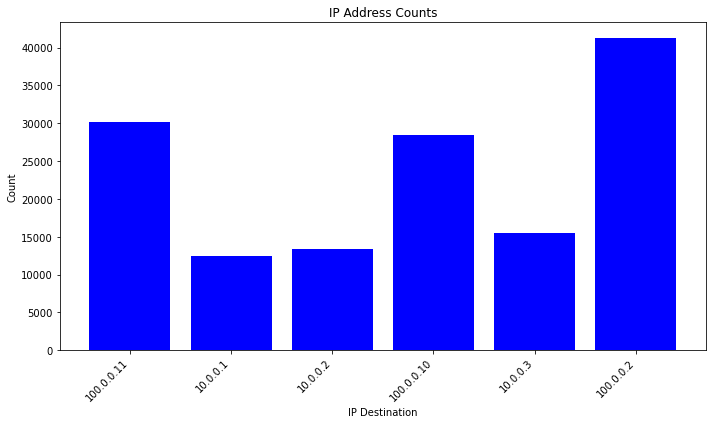

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(ip_addresses, counts, color='blue')
plt.xlabel('IP Destination')
plt.ylabel('Count')
plt.title('IP Address Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [39]:
db = client['Packets']  # Sostituisci con il nome del tuo database
collection = db['IpDst'] 
desired_dates = ['2023-08-16', '2023-08-17']  # Sostituisci con le date che ti interessano

# Ottieni i dati dalla collezione MongoDB per le date desiderate
pipeline = [
    {
        "$match": {
            "date": {"$in": desired_dates}
        }
    },
    {
        "$group": {
            "_id": {
                "date": "$date",
                "ip_dst": "$ip_dst"
            },
            "total_packets": {"$sum": "$count"}
        }
    }
]

result = list(collection.aggregate(pipeline))


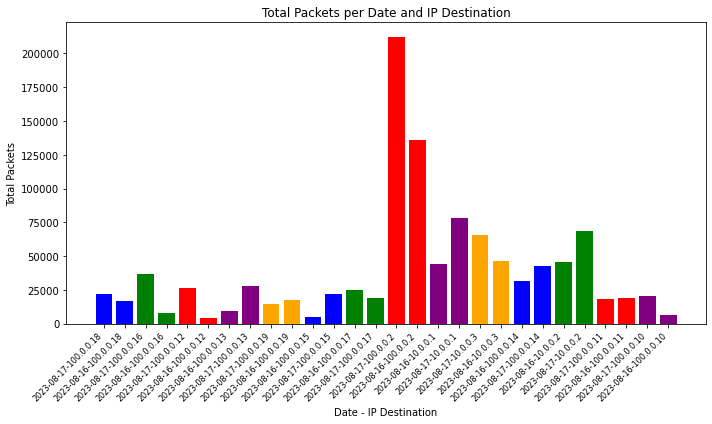

In [40]:
ip_groups = {}
for entry in result:
    ip_dst = entry['_id']['ip_dst']
    if ip_dst not in ip_groups:
        ip_groups[ip_dst] = []
    ip_groups[ip_dst].append(entry)

# Prepara i dati per il grafico e assegna colori
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Aggiungi più colori se necessario
for i, (ip_dst, entries) in enumerate(ip_groups.items()):
    labels = [f"{entry['_id']['date']}-{ip_dst}" for entry in entries]
    total_packets = [entry['total_packets'] for entry in entries]
    plt.bar(labels, total_packets, color=colors[i % len(colors)])

plt.xlabel('Date - IP Destination')
plt.ylabel('Total Packets')
plt.title('Total Packets per Date and IP Destination')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [10]:
collection = db["MacDst"]
ip_counts = {}
for entry in collection.find({}, {"mac_dst": 1, "count": 1}):
    ip = entry["mac_dst"]
    count = entry["count"]
    if ip and isinstance(ip, str):  
        if ip in ip_counts:
            ip_counts[ip] += count
        else:
            ip_counts[ip] = count

# Preparazione dei dati per il grafico
ip_addresses = list(ip_counts.keys())
counts = list(ip_counts.values())

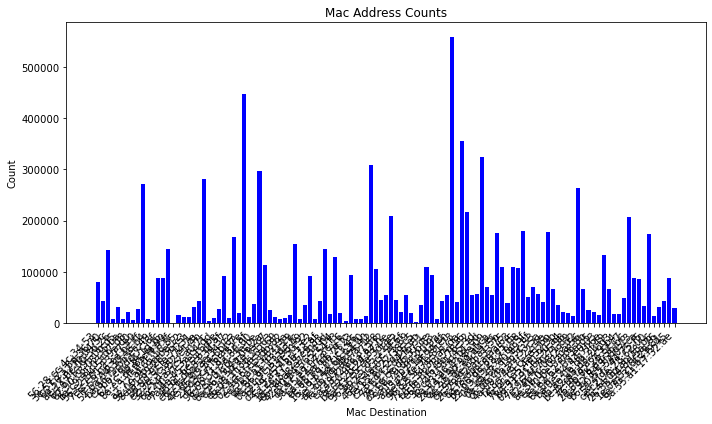

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(ip_addresses, counts, color='blue')
plt.xlabel('Mac Destination')
plt.ylabel('Count')
plt.title('Mac Address Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [51]:
db = client['Packets']  # Sostituisci con il nome del tuo database
collection = db['MacDst'] 
desired_dates = ['2023-08-16', '2023-08-17']  # Sostituisci con le date che ti interessano

# Ottieni i dati dalla collezione MongoDB per le date desiderate
pipeline = [
    {
        "$match": {
            "date": {"$in": desired_dates}
        }
    },
    {
        "$group": {
            "_id": {
                "date": "$date",
                "mac_dst": "$mac_dst"
            },
            "total_packets": {"$sum": "$count"}
        }
    }
]

result = list(collection.aggregate(pipeline))


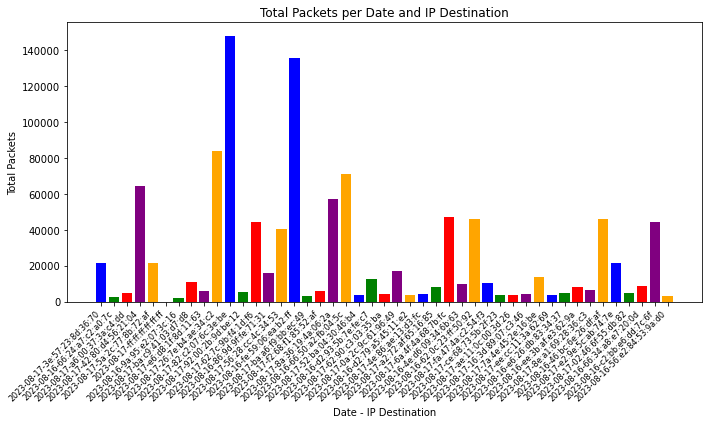

In [52]:
mac_groups = {}
for entry in result:
    mac_dst = entry['_id']['mac_dst']
    if mac_dst not in mac_groups:
        mac_groups[mac_dst] = []
    mac_groups[mac_dst].append(entry)

# Prepara i dati per il grafico e assegna colori
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Aggiungi più colori se necessario
for i, (mac_dst, entries) in enumerate(mac_groups.items()):
    labels = [f"{entry['_id']['date']}-{mac_dst}" for entry in entries]
    total_packets = [entry['total_packets'] for entry in entries]
    plt.bar(labels, total_packets, color=colors[i % len(colors)])

plt.xlabel('Date - IP Destination')
plt.ylabel('Total Packets')
plt.title('Total Packets per Date and IP Destination')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [8]:
collection = db["MacSrc"]
ip_counts = {}
for entry in collection.find({}, {"mac_src": 1, "count": 1}):
    ip = entry["mac_src"]
    count = entry["count"]
    if ip and isinstance(ip, str):  
        if ip in ip_counts:
            ip_counts[ip] += count
        else:
            ip_counts[ip] = count

# Preparazione dei dati per il grafico
ip_addresses = list(ip_counts.keys())
counts = list(ip_counts.values())

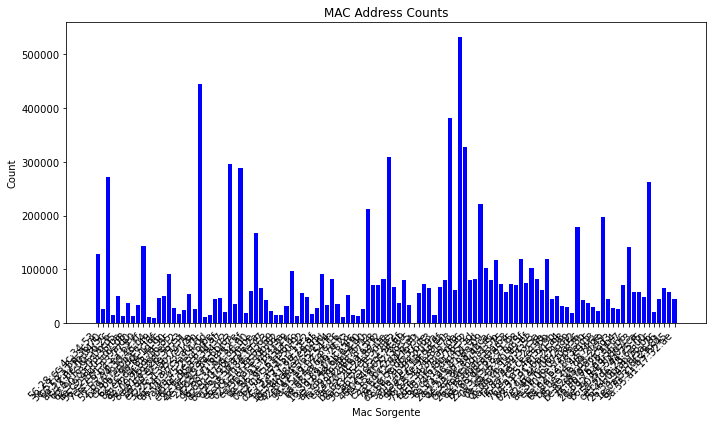

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(ip_addresses, counts, color='blue')
plt.xlabel('Mac Sorgente')
plt.ylabel('Count')
plt.title('MAC Address Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [46]:
db = client['Packets']  # Sostituisci con il nome del tuo database
collection = db['MacSrc'] 
desired_dates = ['2023-08-16', '2023-08-17']  # Sostituisci con le date che ti interessano

# Ottieni i dati dalla collezione MongoDB per le date desiderate
pipeline = [
    {
        "$match": {
            "date": {"$in": desired_dates}
        }
    },
    {
        "$group": {
            "_id": {
                "date": "$date",
                "mac_src": "$mac_src"
            },
            "total_packets": {"$sum": "$count"}
        }
    }
]

result = list(collection.aggregate(pipeline))

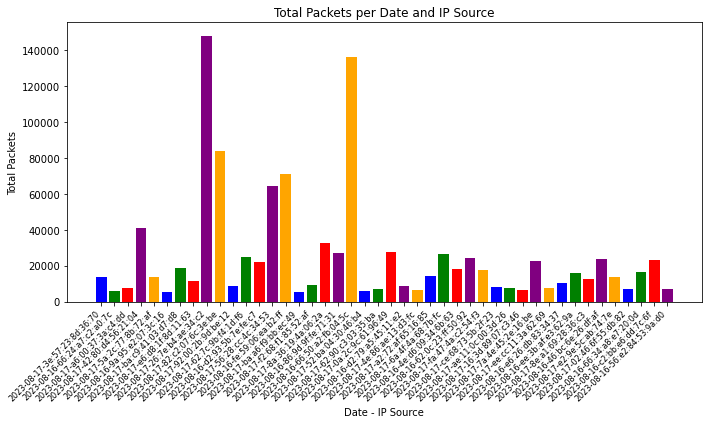

In [49]:
mac_groups = {}
for entry in result:
    mac_src = entry['_id']['mac_src']
    if mac_src not in mac_groups:
        mac_groups[mac_src] = []
    mac_groups[mac_src].append(entry)

# Prepara i dati per il grafico e assegna colori
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Aggiungi più colori se necessario
for i, (mac_src, entries) in enumerate(mac_groups.items()):
    labels = [f"{entry['_id']['date']}-{mac_src}" for entry in entries]
    total_packets = [entry['total_packets'] for entry in entries]
    plt.bar(labels, total_packets, color=colors[i % len(colors)])

plt.xlabel('Date - IP Source')
plt.ylabel('Total Packets')
plt.title('Total Packets per Date and IP Source')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [24]:
collection = db["Tipo"]
ip_counts = {}
for entry in collection.find({}, {"type": 1, "count": 1}):
    ip = entry["type"]
    count = entry["count"]
    if ip and isinstance(ip, str):
        if ip in ip_counts:
            ip_counts[ip] += count
        else:
            ip_counts[ip] = count

# Preparazione dei dati per il grafico
ip_addresses = list(ip_counts.keys())
counts = list(ip_counts.values())

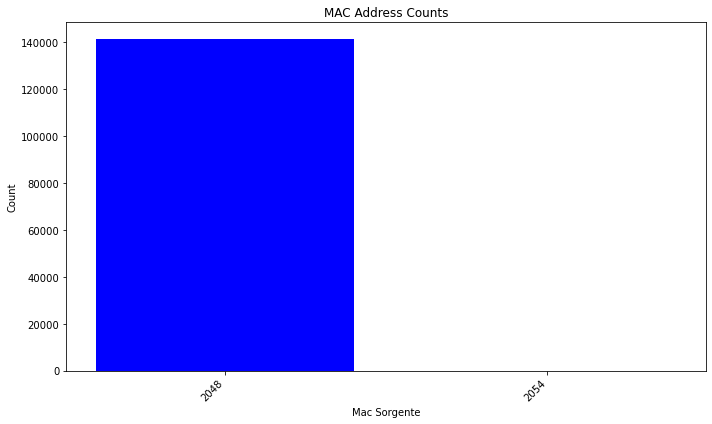

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(ip_addresses, counts, color='blue')
plt.xlabel('Protocolli Etherenet')
plt.ylabel('Count')
plt.title('Protocolli Counts)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [53]:
db = client['Packets']  # Sostituisci con il nome del tuo database
collection = db['Tipo'] 
desired_dates = ['2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19' ]  # Sostituisci con le date che ti interessano

# Ottieni i dati dalla collezione MongoDB per le date desiderate
pipeline = [
    {
        "$match": {
            "date": {"$in": desired_dates}
        }
    },
    {
        "$group": {
            "_id": {
                "date": "$date",
                "type": "$type"
            },
            "total_packets": {"$sum": "$count"}
        }
    }
]

result = list(collection.aggregate(pipeline))

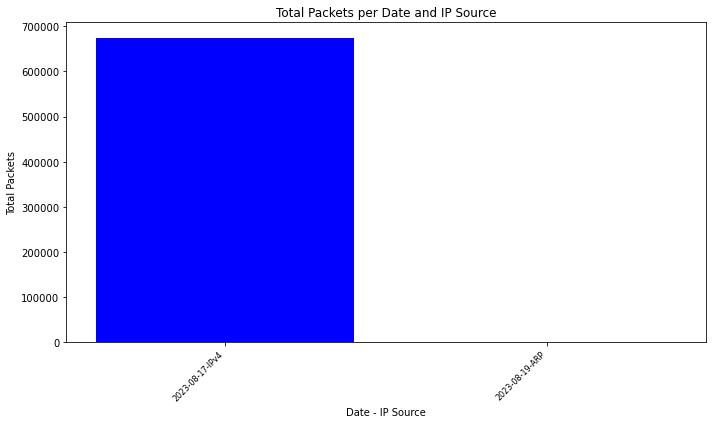

In [54]:
tipo_groups = {}
for entry in result:
    tipo = entry['_id']['type']
    if tipo not in mac_groups:
        tipo_groups[tipo] = []
    tipo_groups[tipo].append(entry)

# Prepara i dati per il grafico e assegna colori
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Aggiungi più colori se necessario
for i, (tipo, entries) in enumerate(tipo_groups.items()):
    labels = [f"{entry['_id']['date']}-{tipo}" for entry in entries]
    total_packets = [entry['total_packets'] for entry in entries]
    plt.bar(labels, total_packets, color=colors[i % len(colors)])

plt.xlabel('Date - IP Source')
plt.ylabel('Total Packets')
plt.title('Total Packets per Date and IP Source')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [55]:
db = client['Packets']  # Sostituisci con il nome del tuo database
collection = db['NumeroPacchettiOra']  # Sostituisci con il nome della tua collezione

# Ottieni i dati dalla collezione MongoDB
pipeline = [
    {
        "$group": {
            "_id": "$ora",
            "total_count": {"$sum": "$count"}
        }
    },
    {
        "$sort": {"_id": 1}
    }
]

result = list(collection.aggregate(pipeline))


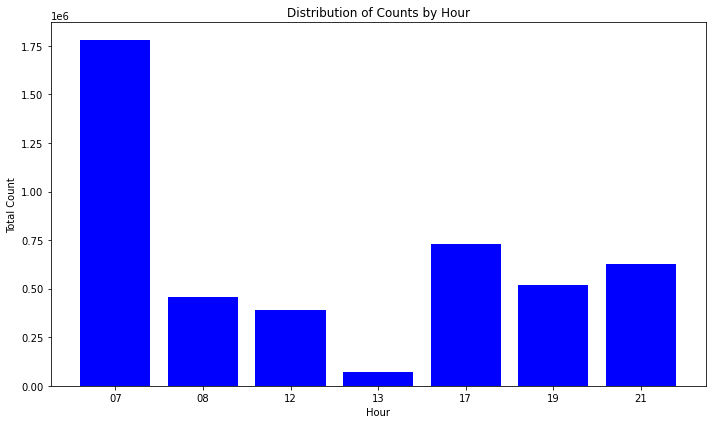

In [56]:
hours = [entry['_id'] for entry in result]
total_counts = [entry['total_count'] for entry in result]

# Creazione del grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(hours, total_counts, color='blue')
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.title('Distribution of Counts by Hour')
plt.tight_layout()

# Mostra il grafico
plt.show()

In [6]:

db = client['Packets']  # Sostituisci con il nome del tuo database
collection = db['NumeroPacchetti']  # Sostituisci con il nome della tua collezione

# Ottieni i dati dalla collezione MongoDB
pipeline = [
    {
        "$group": {
            "_id": "$date",
            "total_count": {"$sum": "$count"}
        }
    },
    {
        "$sort": {"_id": 1}
    }
]

result = list(collection.aggregate(pipeline))


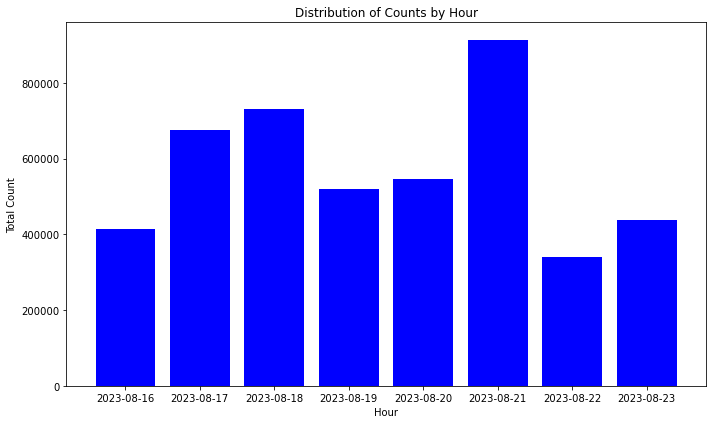

In [7]:
hours = [entry['_id'] for entry in result]
total_counts = [entry['total_count'] for entry in result]

# Creazione del grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(hours, total_counts, color='blue')
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.title('Distribution of Counts by Day')
plt.tight_layout()

# Mostra il grafico
plt.show()